In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
#!pip install tensorflow
#!pip install xgboost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor

In [2]:
#  For running on weather augmented data
X_train_label = pd.read_csv('./data/X_train_label.csv')
X_test_label = pd.read_csv('./data/X_test_label.csv')
Y_train = pd.read_csv('./data/Y_train.csv')
Y_test = pd.read_csv('./data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('./data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('./data/arr_delay_only_y_test.csv')

In [3]:
#  For running on original data
X_train_label = pd.read_csv('./data/old_data/X_train_label.csv')
X_test_label = pd.read_csv('./data/old_data/X_test_label.csv')
Y_train = pd.read_csv('./data/old_data/Y_train.csv')
Y_test = pd.read_csv('./data/old_data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('./data/old_data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('./data/old_data/arr_delay_only_y_test.csv')

# For overall arrival delay

### Linear Regressison model

In [4]:
model = LinearRegression()
model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 25.57092279833283


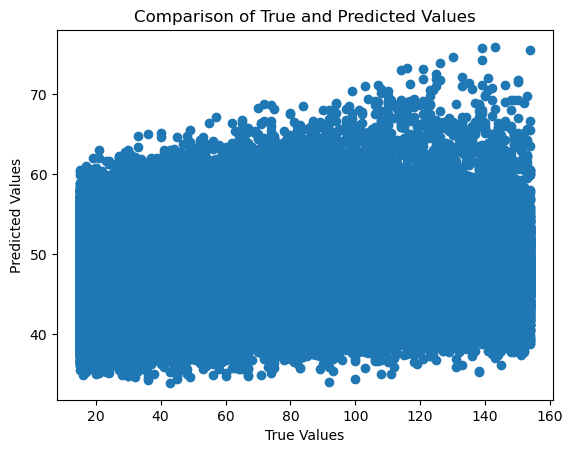

In [5]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [6]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.78841481953879


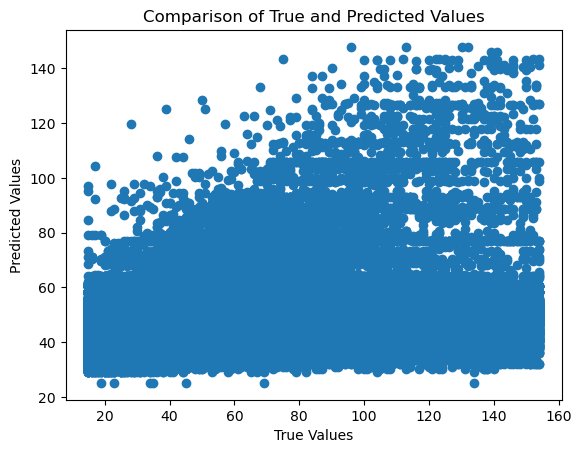

In [7]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()


### Random Forest Regressor

In [8]:
# Train the Random Forest regressor with custom depth and other parameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_label, arr_delay_only_y_train.values.ravel())  # ravel() to convert column vector to 1d array

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.704004961005985


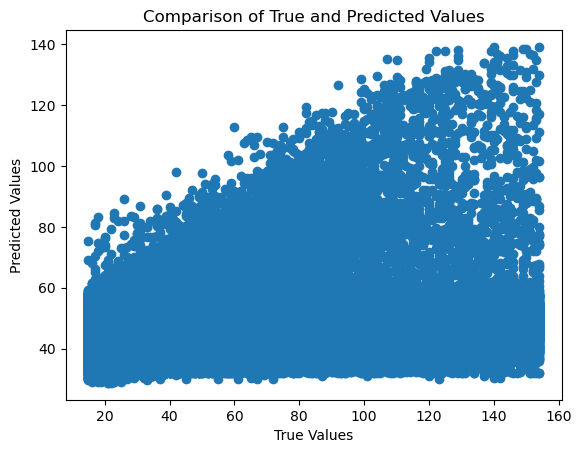

In [9]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

# For individual delay components

### Linear Regression




In [10]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 17.248873236844684
DELAY_DUE_WEATHER: 3.4752543612275772
DELAY_DUE_SECURITY: 0.2703864480743942
DELAY_DUE_NAS: 9.204523194047093
DELAY_DUE_LATE_AIRCRAFT: 20.22131407095114


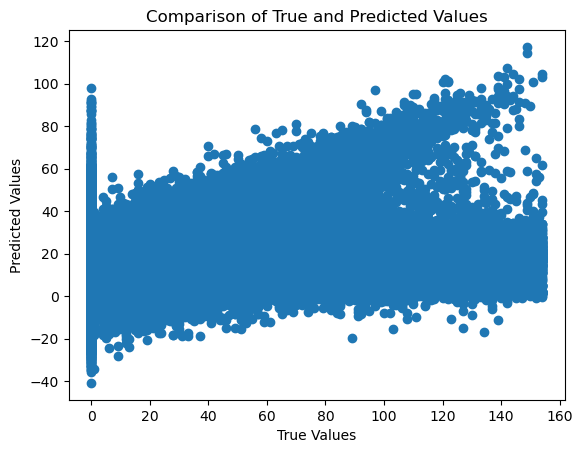

In [11]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [12]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # Example: max_depth=10, min_samples_leaf=5
tree_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 16.46305759868249
DELAY_DUE_WEATHER: 3.428617221236479
DELAY_DUE_SECURITY: 0.2677634828359477
DELAY_DUE_NAS: 8.872487804136327
DELAY_DUE_LATE_AIRCRAFT: 19.46227734626004


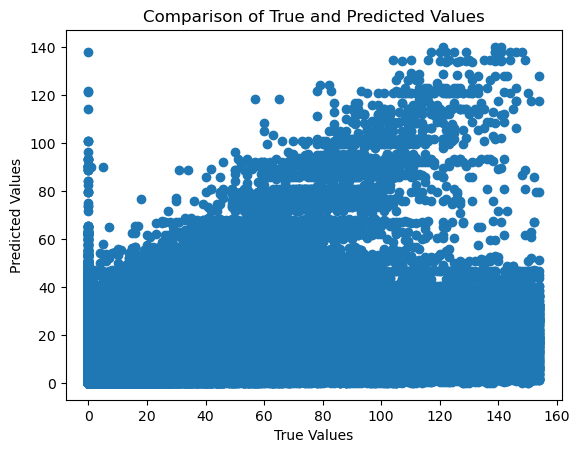

In [13]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Random Forest Regressor

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 16.41729577455312
DELAY_DUE_WEATHER: 3.429455383746371
DELAY_DUE_SECURITY: 0.26729454566925476
DELAY_DUE_NAS: 8.785127630374772
DELAY_DUE_LATE_AIRCRAFT: 19.424422307845578


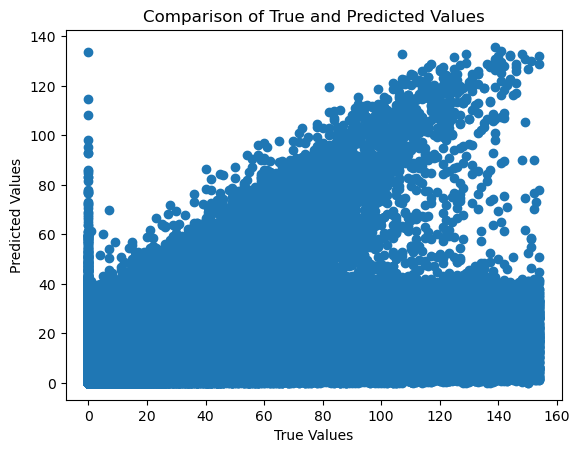

In [15]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Neural Network

In [16]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_label.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5)  # Number of output neurons should match the number of columns in Y
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_label, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_label, Y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
Y_pred = model.predict(X_test_label)

# Calculate Mean Absolute Error for each column
mae_columns = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for each column:")
print(mae_columns)

c:\Users\ebror\OneDrive\Documents\GitHub\Project\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 949us/step - loss: 825.4440 - mae: 13.0222 - val_loss: 365.1059 - val_mae: 10.3392
Epoch 2/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 22s 940us/step - loss: 368.0812 - mae: 10.1338 - val_loss: 362.0233 - val_mae: 9.8702
Epoch 3/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 946us/step - loss: 363.4500 - mae: 10.0181 - val_loss: 359.7373 - val_mae: 9.9374
Epoch 4/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 948us/step - loss: 362.8526 - mae: 10.0029 - val_loss: 360.4933 - val_mae: 9.5855
Epoch 5/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 945us/step - loss: 362.6206 - mae: 9.9858 - val_loss: 361.1721 - val_mae: 10.2218
Epoch 6/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 943us/step - loss: 363.2089 - mae: 9.9825 - val_loss: 360.2129 - val_mae: 10.0035
Epoch 7/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 23s 950us/step - loss: 361.6787 - mae: 9.9558 - val_loss: 359.6362 - val_mae: 9.8697
Epoch 8/50
23816/23816 ━━━━━━━━━━━━━━━━━━━━ 22s 937us/step - loss: 361.4429 - mae: 9.9571 

### XGBoost Regressor

In [17]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_label, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_label)
Y_train_pred = xgb_regressor.predict(X_train_label)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 9.174652099609375
Test Mean Absolute Error: 9.263082504272461
Train Mean Squared Error: 323.2195129394531
Test Mean Squared Error: 330.2734375


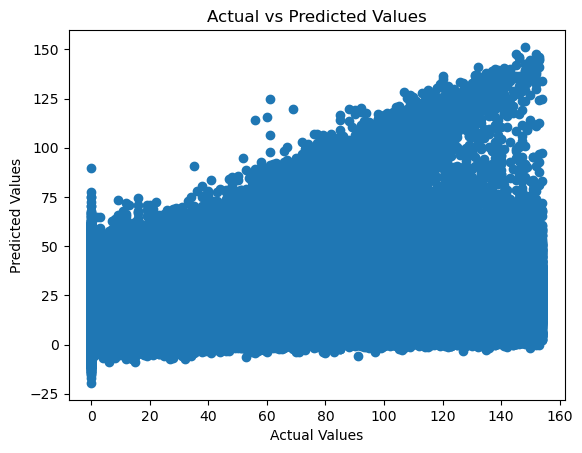

In [18]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

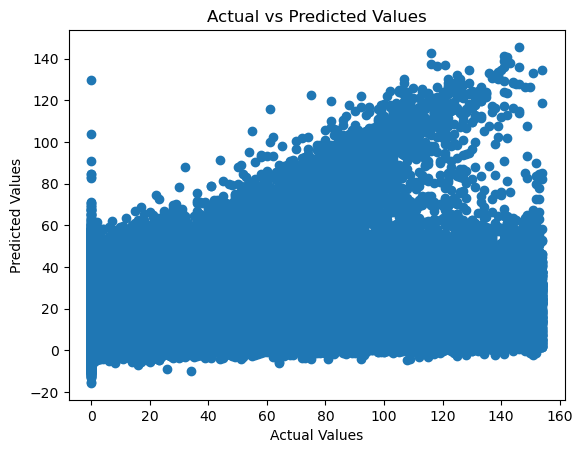

In [19]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()